In [1]:
import numpy as np

def read_polygon_list(data_file, jumps = 1):
    """ Read a data_file containing a list of polygons,
    and plot them. 
    
    The polygons are assumed to be separated by empty
    lines (\n). For each polygon, the vertices are given, separated by an empty space.
    
    The parameter jumps is an integer greater than 1 that can be used
    for plots with thousands of polygons. If jumps>1, then only the plots
    1,1+jumps,... are plotted. 
    """    
    # open file
    f = open(data_file)
    
    # read polygons
    v = []
    polygon_list = []
    new_polygon = 1; # detects when we finished reading a new polygon. this is because for some inputs, the polygons are separated by more than one end of line.
    i = 0 # counts the number of polygons
    
    for line in f:
        
        if line != '\n':
            v.append(np.array(line.split()).astype(float))
            new_polygon = 1
        elif line == '\n' and new_polygon:
            if (mod(i, jumps) == 0):
                polygon_list.append(polygon(v))
            v = []
            new_polygon = 0
            i += 1;
            
            
    fig = sum(p for p in polygon_list)
    fig.axes_labels(['$x_1$','$x_2$'])
    fig.show()
    
    return polygon_list, i, fig

Let's try the pendulum model.

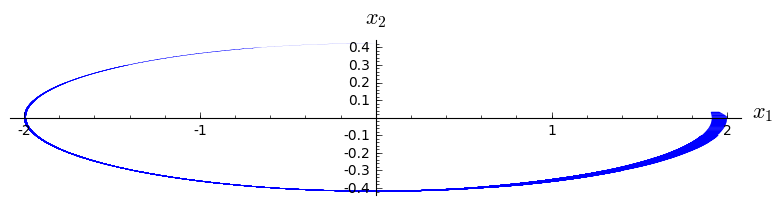

elapsed time (sec):  11.148276


In [8]:
t = cputime()
data_file = 'pend.gen'
[polygon_list, i, fig] = read_polygon_list(data_file, jumps = 1)
print 'elapsed time (sec): ', cputime(t)

Now we plot one every ten polygons, by setting `jumps=10`.

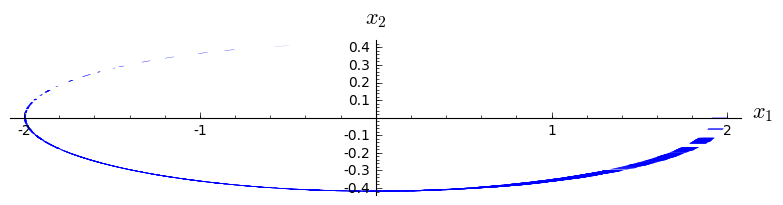

elapsed time (sec):  1.759419


In [9]:
t = cputime()
data_file = 'pend.gen'
[polygon_list, i, fig] = read_polygon_list(data_file, jumps=10)
print 'elapsed time (sec): ', cputime(t)

Notice that the computation time reduced by a factor of 10 when the jumps are set to 10.

A more complete implementation using unequal jumps is available as an m-script.